## Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from math import sqrt
from numpy import loadtxt
from itertools import product
from tqdm import tqdm
from sklearn import preprocessing
from matplotlib import pyplot

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import utils

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
data = pd.read_excel('Sample_Superstore_working.xlsx')
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Explatorary Data Analysis

Explore the data types

We have a mix of numeric and categorical data

In [3]:
data.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Category                 object
Sub-Category             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Find Nulls in Data

In [4]:
data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Describe the data

In [5]:
data.describe(include = 'all')

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,5009,1237,1334,4,793,3,1,531,49,4,3,17,NaN,NaN,NaN,NaN
top,CA-2017-100111,2016-09-05 00:00:00,2015-12-16 00:00:00,Standard Class,William Brown,Consumer,United States,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,14,38,35,5968,37,5191,9994,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
first,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750


Understand the shape

In [6]:
data.shape

(9994, 16)

### Linear Regression Model

#### Feature Selection

In [7]:
feature = data[['Sales', 'Quantity']] # the X
target = data['Profit'] # the Y

In [8]:
X = feature
y = target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
X_train.head()

,Sales,Quantity
1963,24.900,5
9348,842.720,8
8795,211.168,4
9389,2.040,1
5090,8.784,1


In [11]:
X_test.head()

,Sales,Quantity
1814,170.136,3
881,30.840,2
1122,22.960,7
6807,98.376,3
2911,41.400,5


In [12]:
y_train.head()

1963     11.7030
9348    202.2528
8795     15.8376
9389      0.9588
5090      3.1842
Name: Profit, dtype: float64

In [13]:
y_test.head()

1814    -8.5068
881      8.3268
1122     6.6584
6807    35.6613
2911    19.4580
Name: Profit, dtype: float64

In [14]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [15]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
predictions = model.predict(X)
print('Predicted Sales Response', predictions[0:5])

Predicted Sales Response [ 40.39095509 122.84075052  -4.72912791 157.43270621  -3.31572772]


In [17]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.23043674154534877


In [18]:
print('Model Score',model.score(X,y) * 100, '%')

Model Score 23.043674154534877 %


In [19]:
print('Model Coefficient', model.coef_ ) 

Model Coefficient [ 0.18242129 -3.28456458]


In [20]:
print('Model Intercept', lm.intercept_)

Model Intercept -0.8269980771046122


In [21]:
print('Intercept', model.intercept_)
pd.DataFrame(data = model.coef_, index = X_train.columns, columns = ['coef'])

Intercept -0.8269980771046122


,coef
Sales,0.182421
Quantity,-3.284565


Increase in Sales can lead to an increase in profit
However, and increase in quantity does not yield an increase in profits

### Test the RMSE

In [22]:
y_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Test RMSE: %f' % test_rmse)

Test RMSE: 228.691322


This value means that on average, the error in the predicted median sale price is approximately $593.65

## Decision Tree Classifier

#### Feature Selection

In [23]:
feature = data[['Quantity']]
target = data['Sales']

In [24]:
X = feature
y = target


#### Split the Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
print('Training data size: (%i,%i)' % X_train.shape)
print('Testing data size: (%i,%i)' % X_test.shape)

Training data size: (6995,1)
Testing data size: (2999,1)


In [27]:
X_train.head()

,Quantity
1963,5
9348,8
8795,4
9389,1
5090,1


In [28]:
X_test.head()

,Quantity
1814,3
881,2
1122,7
6807,3
2911,5


In [29]:
y_train.head()

1963     24.900
9348    842.720
8795    211.168
9389      2.040
5090      8.784
Name: Sales, dtype: float64

In [30]:
y_test.head()

1814    170.136
881      30.840
1122     22.960
6807     98.376
2911     41.400
Name: Sales, dtype: float64

In [31]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

#### Build the Decision Tree Model

In [32]:
lab_enc = preprocessing.LabelEncoder()
new_y_train = lab_enc.fit_transform(y_train)
print(new_y_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(new_y_train))

[1278 4386 3326 ...  755 3886 4203]
continuous
multiclass
multiclass


In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,new_y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_train))

ValueError: Found input variables with inconsistent numbers of samples: [2999, 6995]

### Visualize Decision Tree

### Scaling the Features

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [36]:
print('Training set mean by feature:')
print(X_train.mean(axis=0))
print('Training set standard deviation by feature:')
print(X_train.std(axis=0))

Training set mean by feature:
[-5.48524771e-17]
Training set standard deviation by feature:
[1.]


In [37]:
print('Training set mean by feature:')
print(X_train.mean())
print('Training set standard deviation by feature:')
print(X_train.std())

Training set mean by feature:
-5.48524770994216e-17
Training set standard deviation by feature:
1.0


#### Data by segment profit and sales

In [38]:
data_SegmentProfit = data.groupby('Segment').agg({'Profit':'sum'})
data_SegmentProfit

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


In [39]:
data_SegmentSales = data.groupby('Segment').agg({'Sales':'mean'})
data_SegmentSales

,Sales
Segment,
Consumer,223.733644
Corporate,233.823300
Home Office,240.972041


In [40]:
data_SegmentSales = data.groupby('Segment').agg({'Sales':'median'})
data_SegmentSales

,Sales
Segment,
Consumer,53.72
Corporate,56.54
Home Office,52.44


In [41]:
data_SegmentSales = data.groupby('Segment').agg({'Sales':'sum'})
data_SegmentSales

,Sales
Segment,
Consumer,1.161401e+06
Corporate,7.061464e+05
Home Office,4.296531e+05


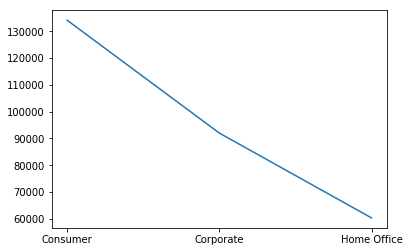

In [42]:
plt.plot(data_SegmentProfit)

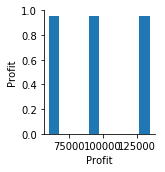

In [43]:
sns.pairplot(data_SegmentProfit)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


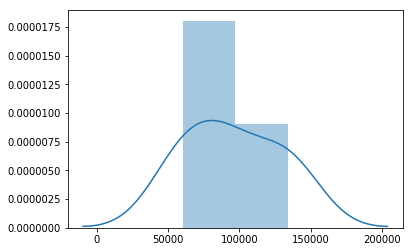

In [44]:
sns.distplot(data_SegmentProfit)

#### Plot data and Linear regression model fit

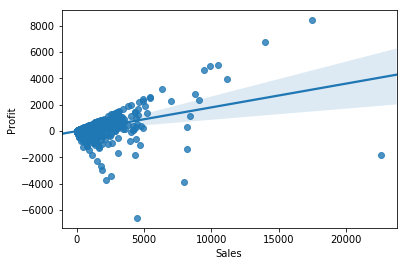

In [45]:
sns.regplot(x = 'Sales', y = 'Profit', data = data)

#### Plot data and regression model fits across a FacetGrid

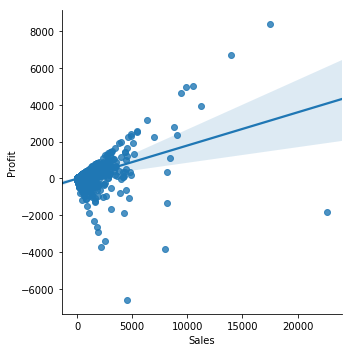

In [46]:
sns.lmplot(x = 'Sales', y = 'Profit', data = data)

#### Plot the residuals of a linear regression.


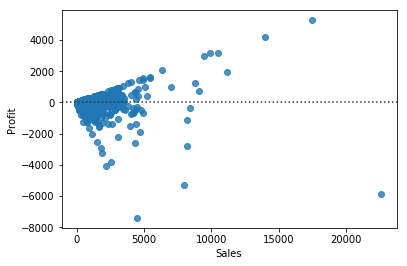

In [47]:
sns.residplot(x = 'Sales', y = 'Profit', data = data)